# 5 . Fourier Transform

---
### Introduction 

Fourier transform is a function that transforms a *time* domain signal into *frequency* domain. The function accepts a time signal as input and produces the frequency representation of the signal  as an output.

The transformation from xn→Xk is a translation from configuration space to frequency space and can be very useful in both exploring the power spectrum of a signal and also for transforming certain problems for more efficient computation.All signals in the real world is a time signal and is will be up of many sinusoids of different frequencies. So, time domain signal can be converted into the frequency domain to view different frequency components associated with the signal .

Fourier transform doesn’t change the properties of signal. It just provides a different view to analyze  time signal because some properties and features of the signal can be fully explored in the frequency domain,But not in time domain .

The most important application of Fourier transform in context of predictive maintenance is vibration analysis which makes use of the fact that all rotating equipment vibrates to a certain degree. The incoming vibration data from the sensors is converted into the frequency domain where you can analyze the frequency of vibration and compare it to the standard baseline to see if your equipment is functioning optimally or not.


The Fourier transform deconstructs a time domain representation of a signal into the
frequency domain representation. The frequency domain shows the voltages present at
varying frequencies. It is a different way to look at the same signal.
A digitizer samples a waveform and transforms it into discrete values. Because of this
transformation, the Fourier transform will not work on this data. Instead, the discrete Fourier
transform (DFT) is used, which produces as its result the frequency domain components in
discrete values, or bins. The fast Fourier (FFT) is an optimized implementation of a DFT that
takes less computation to perform but essentially just deconstructs a signa

--
### Discrete Fourier transform 



 $ X[k] = \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi \frac{k n}{N}}$
 
  - X  is also length  
  - N  and the value at index  
  - k  is the frequency component of  x  at normalized frequency  2πkN  radians per sample. 
  
  Each element of  X  is the result of multiplying the signal  x  by a signal with only one frequency component at the appropriate frequency, then summing the result.  DFT is invertibleas well . to go from  X  to  x  simply apply the same transformation except with a positive exponential instead of the negative. This is the "Inverse Discrete Fourier Transform" (IDFT).
  
**Basis functions of DFT?**

The sine and cosine waves used in the DFT are commonly called the *DFT basis functions*. The output of the DFT is a set of numbers that represent amplitudes. The basis functions are a set of sine and cosine waves with unity amplitude. If you assign each amplitude (the frequency domain) to the proper sine or cosine wave (the basis functions), the result is a set of scaled sine and cosine waves that can be added to form the time domain signal.This will facilitate to split the mixed signals components into two seperate componenets .
  
 

**Where have you used DFT in your daily life?**

If you have seen JPEG image , listened to an MP3 song , watched an MPEG movie, used the voice recognition capabilities of Amazon's Alexa, you have used some variant of the DFT to realize the functionality. Its efficient implementation is called the  the Fast Fourier Transform which is considered one of the most important algorithms in computer science.



**What is the technical Use of DFT ?**

To get the frequency of a sine wave we need to get its Discrete Fourier Transform(DFT). You just need to know how to use it.
In its simplest terms, The **DFT**  converts a time domain signal to a frequency domain. it  takes a signal and calculates which frequencies are present in it.

## Program to compute the DFT of a signal 

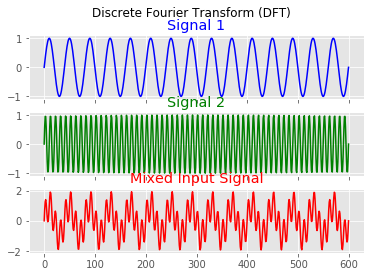

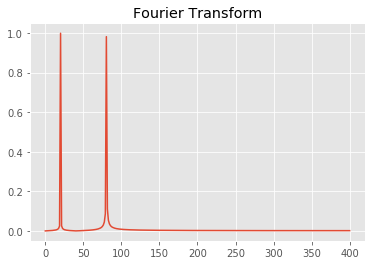

In [4]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import math
import numpy as np



# functon written to repeatedly do the required summation operaions
def calc_dft(sig_src_arr):
    sig_dest_imx_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_rex_arr = [None]*int((len(sig_src_arr)/2))
    sig_dest_mag_arr = [None]*int((len(sig_src_arr)/2))
   
    #initialize all the array elements with zero before storing 
    for j in range(int(len(sig_src_arr)/2)):
        # Here the length becomes half of the time domain signal in frequency domain 
        sig_dest_rex_arr[j] =0
        sig_dest_imx_arr[j] =0

    for k in range(int(len(sig_src_arr)/2)):
        
        for i in range(len(sig_src_arr)):
            sig_dest_rex_arr[k] = sig_dest_rex_arr[k] + sig_src_arr[i]*math.cos(2*math.pi*k*i/len(sig_src_arr))
            sig_dest_imx_arr[k] = sig_dest_imx_arr[k] - sig_src_arr[i]*math.sin(2*math.pi*k*i/len(sig_src_arr))
   
    for x in range(int(len(sig_src_arr)/2)):
        sig_dest_mag_arr[x] = math.sqrt(math.pow(sig_dest_rex_arr[x],2)+math.pow(sig_dest_imx_arr[x],2))
       
    return sig_dest_mag_arr,sig_dest_rex_arr,sig_dest_imx_arr
            


# Number of samplepoints
N = 600

# sample spacing
T = 1.0 / 800.0
f1=80.0
f2=20.0

x = np.linspace(0.0, N*T, N)

# Define the signals and its frequencies
s1=np.sin(f1 * 2.0*np.pi*x)
s2=np.sin(f2 * 2.0*np.pi*x)
y = s1+s2
yf,real,img = calc_dft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)




style.use('ggplot')
f,plt_arr = plt.subplots(3, sharex=True)
f.suptitle("Discrete Fourier Transform (DFT)")

plt_arr[0].plot(s2, color='blue')
plt_arr[0].set_title("Signal 1",color='blue')
    
plt_arr[1].plot(s1, color='green')
plt_arr[1].set_title("Signal 2",color='green')

plt_arr[2].plot(y, color='red')
plt_arr[2].set_title("Mixed Input Signal",color='red')

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
ax.set_title("Fourier Transform")
plt.show()

    


#### NOTE:
Here we sucessfuly classified the given Input signal which had more than one frequency component into differenent frequency components .This method of coversion of signal in time domain to frequency domain is known as fourier transformation 

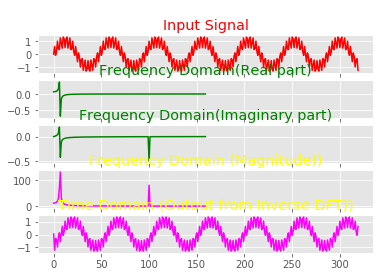

In [32]:
import mysignals as sigs
from matplotlib import pyplot as plt
from matplotlib import style
import math

sig_dest_imx_arr = []
sig_dest_rex_arr = []
sig_dest_mag_arr = []

        
  
def plot_signals(sig_src_arr):
    style.use('ggplot')
    
    f,plt_arr = plt.subplots(5, sharex=True)
    f.suptitle("Discrete Fourier Transform (DFT)")

    plt_arr[0].plot(sig_src_arr, color='red')
    plt_arr[0].set_title("Input Signal",color='red')
    
    plt_arr[1].plot(sig_dest_rex_arr, color='green')
    plt_arr[1].set_title("Frequency Domain(Real part)",color='green')

    plt_arr[2].plot(sig_dest_imx_arr, color='green')
    plt_arr[2].set_title("Frequency Domain(Imaginary part)",color='green')

    plt_arr[3].plot(sig_dest_mag_arr, color='magenta')
    plt_arr[3].set_title("Frequency Domain (Magnitude))",color='yellow')

    plt_arr[4].plot(sig_dest_idft_arr, color='magenta')
    plt_arr[4].set_title("Time Domain (Outout from Inverse DFT))",color='yellow')

    
    plt.show()



sig_dest_idft_arr =[]  

def calc_idft(sig_src_rex_arr, sig_src_imx_arr):
     global sig_dest_idft_arr
     sig_dest_idft_arr = [None]*(len(sig_src_rex_arr)*2)

     for j in range(len(sig_src_rex_arr)*2):
         sig_dest_idft_arr[j] =0


     for x in range(len(sig_src_rex_arr)):
        sig_src_rex_arr[x] =  sig_src_rex_arr[x]/len(sig_src_rex_arr)
        sig_src_imx_arr[x] =  sig_src_imx_arr[x]/len(sig_src_rex_arr)


     for k in range(len(sig_src_rex_arr)):
        for i in range(len(sig_src_rex_arr)*2):
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_rex_arr[k] *math.cos(2*math.pi*k*i/(len(sig_src_rex_arr)*2))
            sig_dest_idft_arr[i] = sig_dest_idft_arr[i] + sig_src_imx_arr[k] *math.sin(2*math.pi*k*i/(len(sig_src_rex_arr)*2))
            


calc_dft(sigs.InputSignal_1kHz_15kHz)
calc_idft(sig_dest_rex_arr,sig_dest_imx_arr)
plot_signals(sigs.InputSignal_1kHz_15kHz)
     


---
### Properties of the Fourier Transform

Let us see and illustrate  illustrate several basic properties of the Fourier Transform .Which may be utilized extensively in day to day life . First, let us define a Python function which approximates the Fourier transform with builtin functions using the numpy library 


In [3]:
def ft(samples, Fs, t0):
    f = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return np.fft.fftshift(np.fft.fft(samples)/Fs * np.exp(-2j*np.pi*f*t0))

Now let us Evaluate few of the known Fourier Transforms and compare it pusing a python program to defina afunction and then to take the faourier transform to get back the standard results

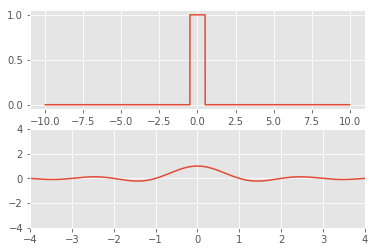

In [40]:
import numpy as np 
from matplotlib import pyplot as plt
style.use('ggplot')
Fs = 10000  # The sampling frequency 
t0 = 10     # The half time interval 
t = np.arange(-t0, t0, 1/Fs)                # the time samples
f = np.arange(-Fs/2, Fs/2, Fs/len(t))       # the corresponding frequency samples
g = lambda t: (abs(t) <=0.5).astype(float)  #  rect function
plt.subplot(211)
plt.plot(t, g(t))

plt.subplot(212)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.plot(f, ft(g(t), Fs, -t0).real)
plt.show()


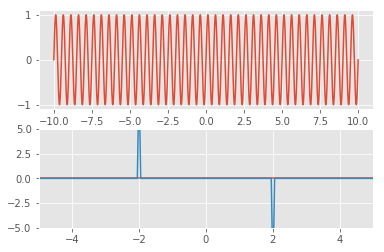

In [38]:
g = lambda t: np.sin(2*np.pi*2*t)  # here we have defined sin function 
plt.subplot(211)
plt.plot(t, g(t))

plt.subplot(212)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.plot(f, ft(g(t), Fs, -t0).real, label='real')
plt.plot(f, ft(g(t), Fs, -t0).imag, label='imag')


F{x(t)} = X(f) 

F{y(t)} = Y(f)

F{ax(t)}+ by(t) &= aX(f)+bY(f) 


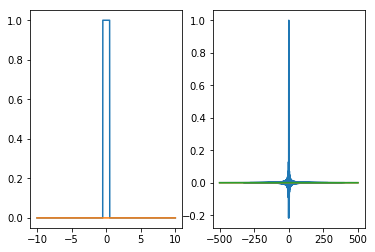

In [6]:
x = rect
X = ft(x(t), Fs, -tstart)

def showShift(t0):
    plt.gcf().clear()
    
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-t0), label='$x(t-t_0)$')
    

    plt.subplot(122)
    Xt0 = ft(x(t-t0), Fs, -tstart)
    plt.plot(f, X.real, label='Re $X(f)$')
    plt.plot(f, Xt0.real, label='Re $X_{t_0}(f)$')
    plt.plot(f, Xt0.imag, label='Im $X_{t_0}(f)$')
    
    
showShift(12)

### Applications of DFT



##### Now let us aplly this to decode a raw ECG signal and extract meaningful data out of it and apply the concets which we have learned now


DSP  has many medical applications and one among them is ECG raw signal analysis to analyze the given signal and fetch meaningful information out of them .ECG Feature Extraction plays a significant role in
diagnosing most of the cardiac diseases. One cardiac cycle in an
ECG signal consists of the P-QRS-T waves. This feature
extraction scheme determines the amplitudes and intervals in the
ECG signal for subsequent analysis. The amplitudes and
intervals value of P-QRS-T segment determines the functioning
of heart of every human. 


**How To calculate BPM from Raw ECG signal ?**

When the cardiac rhythm is regular, the heart rate can be determined by the interval between two successive QRS complexes. On standard paper with the most common tracing settings, the heart rate is calculated by dividing the number of large boxes (5 mm or 0.2 seconds) between two successive QRS complexes




Average Heart Beat is: 72.0

No of peaks in sample are 12


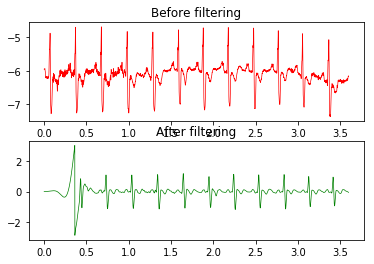

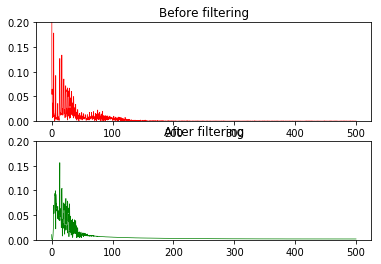

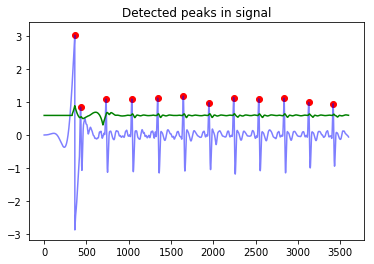

In [1]:
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack    
import scipy.signal as signal
                                                    
 ###Obtain ecg sample from csv file using pandas###
dataset = pd.read_csv("noise.csv")
y = [e for e in dataset.hart]
	
# Number of samplepoints
N = len(y)

# sample spacing
Fs = 1000

T = 1.0 / Fs

#Compute x-axis
x = np.linspace(0.0, N*T, N)

#Compute FFT
yf = scipy.fftpack.fft(y)

#Compute frequency x-axis
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

##Declare plots for time-domain and frequency-domain plots##
fig_td = plt.figure()
fig_td.canvas.set_window_title('Time domain signals')
fig_fd = plt.figure()
fig_fd.canvas.set_window_title('Frequency domain signals')
ax1 = fig_td.add_subplot(211)
ax1.set_title('Before filtering')
ax2 = fig_td.add_subplot(212)
ax2.set_title('After filtering')
ax3 = fig_fd.add_subplot(211)
ax3.set_title('Before filtering')
ax4 = fig_fd.add_subplot(212)
ax4.set_title('After filtering')     

#Plot non-filtered inputs
ax1.plot(x,y, color='r', linewidth=0.7)
ax3.plot(xf, 2.0/N * np.abs(yf[:N//2]), color='r', linewidth=0.7, label='raw')
ax3.set_ylim([0 , 0.2])

#Compute filtering co-efficients to eliminate 50hz brum noise associated with the signal 
b, a = signal.butter(4, 50/(Fs/2), 'low')


#Compute filtered signal
tempf = signal.filtfilt(b,a, y)

#b, a = signal.butter(1, band_filt/(Fs/2), 'bandstop')
tempf = signal.filtfilt(b,a, y)
yff = scipy.fftpack.fft(tempf)


### Compute Kaiser window co-effs to eliminate baseline drift noise ###
nyq_rate = Fs/ 2.0

# The desired width of the transition from pass to stop.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
O, beta = signal.kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 4.0

#Use firwin with a Kaiser window to create a lowpass FIR filter and pass the signal 
taps = signal.firwin(O, cutoff_hz/nyq_rate, window=('kaiser', beta), pass_zero=False)

# Use lfilter to filter x with the FIR filter.
y_filt = signal.lfilter(taps, 1.0, tempf)
yff = scipy.fftpack.fft(y_filt)

#Plot filtered outputs
ax4.plot(xf, 2.0/N * np.abs(yff[:N//2]), color='g', linewidth=0.7)
ax4.set_ylim([0 , 0.2])
ax2.plot(x,y_filt, color='g', linewidth=0.7);



#Compute Number of heart  beats per minute 
dataset['filt']=y_filt

#Calculate moving average with 0.75s in both directions, then append do dataset
hrw = 1 #One-sided window size, as proportion of the sampling frequency
fs = 333 #The example dataset was recorded at 300Hz

#mov_avg = pd.rolling_mean(dataset.filt, window=(int(hrw*fs))) #Calculate moving average
mov_avg = dataset.filt.rolling(int(hrw * fs)).mean()

#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(dataset.filt)) 
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [(0.5+x) for x in mov_avg]

mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
dataset['filt_rollingmean'] = mov_avg #Append the moving average to the dataframe


#Mark regions of interest
window = []
peaklist = []
listpos = 0 

#We use a counter to move over the different data columns
for datapoint in dataset.filt:
    #Get local mean
    rollingmean = dataset.filt_rollingmean[listpos] 
    
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1
        
    #If signal comes above local mean, mark ROI
    elif (datapoint > rollingmean): 
        window.append(datapoint)
        listpos += 1
        
    #If signal drops below local mean -> determine highest point   
    else: 
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition)         #Add detected peak to list
        window = []                           #Clear marked ROI
        listpos += 1

ybeat = [dataset.filt[x] for x in peaklist]     #Get the y-value of all peaks for plotting purposes
fig_hr= plt.figure()
fig_hr.canvas.set_window_title('Peak detector')
ax5 = fig_hr.add_subplot(111)
ax5.set_title("Detected peaks in signal")
ax5.plot(dataset.filt, alpha=0.5, color='blue') #Plot semi-transparent HR
ax5.plot(mov_avg, color ='green')               #Plot moving average
ax5.scatter(peaklist, ybeat, color='red')       #Plot detected peaks
                                                #Compute heart rate
RR_list = []
cnt = 0
while (cnt < (len(peaklist)-1)):
    RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in  of samples
    ms_dist = ((RR_interval / fs) * 1000.0)         #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1

bpm = 60000 / np.mean(RR_list)                        #60000 ms (1 minute) / average R-R interval of signal
print("\n\n\nAverage Heart Beat is: %.01f\n" %(bpm)) #Round off to 1 decimal and print
print("No of peaks in sample are {0}".format(len(peaklist)))
plt.show()

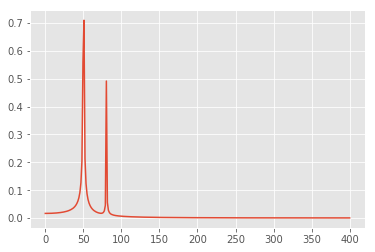

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)


fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()